In [2]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import string
import plotly
import re
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sapmn3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sapmn3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from data_exploring.data_exploring import *

In [4]:
processed_file_datasatisfaction = 'satisfaction_ratingP'
processed_file_npsresponse = 'NPS_responsesP'
if os.path.exists(os.path.join(os.getcwd(),'data_exploring','data',processed_file_datasatisfaction+'.csv')):
    data_satisfaction = loading_data(os.path.join(os.getcwd(),'data_exploring','data',processed_file_datasatisfaction+'.csv'))
else:
    start_time = time.time()
    spell = Speller(lang='es')
    data_satisfaction = loading_data(os.path.join(os.getcwd(),'data_exploring','data','satisfaction_Ratings.csv'))
    data_satisfaction = spell_correction(data_satisfaction, 'Comment', 'processed comment', spell)
    save_dfdata(data_satisfaction, processed_file_datasatisfaction)
    print(time.time() - start_time)

if os.path.exists(os.path.join(os.getcwd(),'data_exploring','data', processed_file_npsresponse+'.csv')):
    data_responses = loading_data(os.path.join(os.getcwd(),'data_exploring','data', processed_file_npsresponse+'.csv'))
else:
    start_time = time.time()
    spell = Speller(lang='es')
    data_responses = loading_data(os.path.join(os.getcwd(),'data_exploring','data', 'NPS_Responses.csv'))
    data_responses = spell_correction(data_responses, 'Comment', 'processed comment', spell)
    save_dfdata(data_responses, processed_file_npsresponse)
    print(time.time() - start_time)

print('there are ' + str(len(data_satisfaction['Ticket Id'].unique())) + ' unique tickets')
print('there are ' + str(len(data_satisfaction)) + ' tickets')
duplicate_tickets = data_satisfaction.groupby('Ticket Id').size().sort_values(ascending=False).reset_index(name ='tickets count')
duplicate_example = data_satisfaction[data_satisfaction['Ticket Id'] == duplicate_tickets['Ticket Id'][3]]
duplicate_example

there are 2657 unique tickets
there are 2774 tickets


,Unnamed: 0,Requester,User Id,Email,Ticket Id,Brand,Group,Assignee,Satisfaction,Comment,Survey Date,processed comment
2254,2254,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,BUENO POR QUE ME RESPONDIERON UN POCO TIEMPO Y...,2020-07-16T14:12:28-05:00,bueno por que me respondieron un poco tiempo y...
2255,2255,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,BUENO POR QUE ME RESPONDIERON UN POCO TIEMPO Y...,2020-07-16T14:12:00-05:00,bueno por que me respondieron un poco tiempo y...
2256,2256,leidy huertas,400578886512,leidy.kari96@gmail.com,583147,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,NaN,2020-07-16T14:11:36-05:00,NaN


In [5]:
data_satisfaction.drop_duplicates(subset=['Ticket Id', 'processed comment'], inplace = True)
print('there are ' + str(len(data_satisfaction['Ticket Id'].unique())) + ' unique tickets')
print('there are ' + str(len(data_satisfaction)) + ' tickets')
duplicate_tickets = data_satisfaction.groupby('Ticket Id').size().sort_values(ascending=False).reset_index(name ='tickets count')
duplicate_example = data_satisfaction[data_satisfaction['Ticket Id'] == duplicate_tickets['Ticket Id'][2]].reset_index()
print(duplicate_example['processed comment'][0])
print(duplicate_example['processed comment'][1])
print(duplicate_example['processed comment'][2])

there are 2657 unique tickets
there are 2761 tickets
si recibi mi pedido pero porque me comunique con la superintendencia para denunciar a coordinadora, no porque ustedes me ayudaran ni porque coordinadora solucionar. ademas cada que pedia soporte con ustedes contestaba muy feo como si fuera culpa del cliente que tal. para la muestra, la respuesta dada al ultimo correo que envie viendo que al momento que envie el correo aun no habia llegado mi pedido. como ven en la guia, el pedido fue entregado en horas de la tarde despues de casi 15 dias de estar en bodega. deberian ser mas amables con los clientes, y mas si el cliente ya pago. y no tenerlos de lado a lado. nunca mas comprar con ustedes al menos por internet. terrible servicio y logistica.
si recibi mi pedido pero porque me comunique con la superintendencia para denunciar a coordinadora, no porque ustedes me ayudaran ni porque coordinadora solucionar. ademas cada que pedia soporte con ustedes contestaba muy feo como si fuera culpa de

In [7]:
data_satisfaction.head()

,Unnamed: 0,Requester,User Id,Email,Ticket Id,Brand,Group,Assignee,Satisfaction,Comment,Survey Date,processed comment
0,0,Carlos Enrique brito,401415540751,carlosenrique1989n@hotmail.com,595380,OFFCORSS,Soporte OFFCORSS,CTS Transporte,good,NaN,2020-08-12T10:32:10-05:00,NaN
1,1,Lizeth Herrera,401737616791,lkhr328@gmail.com,600778,OFFCORSS,Soporte OFFCORSS,Devoluciones,good,NaN,2020-08-12T10:32:09-05:00,NaN
2,2,Carolina Sanchez,401569843672,caritoss1@hotmail.com,598181,OFFCORSS,Soporte OFFCORSS,CTS Transporte,bad,Me parece malo porque llame a explicar el prob...,2020-08-12T10:29:05-05:00,me parece malo porque llame a explicar el prob...
3,3,Joesmy Veloza Silva,401833879531,joesmy0616@gmail.com,600969,OFFCORSS,Call Center,Call Center,good,Excelente,2020-08-12T10:20:39-05:00,excelente
4,4,JOHANA MOSQUERA,401819664832,meilydoriana@gmail.com,600898,OFFCORSS,Call Center,Call Center,good,NaN,2020-08-12T10:03:31-05:00,NaN


In [8]:
data_responses.head()

,Unnamed: 0,Survey Date,Name,User Id,Email,Rating,Classification,Comment,Response Date,processed comment
0,0,2020-08-10,Johanna Vargas T,400842393092,vhannyt@gmail.com,7,passive,NaN,2020-08-10 11:38,NaN
1,1,2020-08-10,Maria Carolina Parra Rincón,400932763371,mariacarolinaparrar@gmail.com,1,detractor,Atender a las reclamaciones a tiempo para evit...,2020-08-10 11:59,atender a las reclamaciones a tiempo para evit...
2,2,2020-08-10,Luz Marina González Pulido,400646948972,14a793667beb4637bc67b25241ee1150@ct.vtex.com.br,0,detractor,"No leen con atención, por favor dictar capacit...",2020-08-10 12:11,"no leen con atención, por favor dictar capacit..."
3,3,2020-08-10,Devolución de producto,401130210752,paolaga@gmail.com,3,detractor,Se debe poder hacer cambios en tiends fisicas....,2020-08-10 12:32,se debe poder hacer cambios en tienda fisicas....
4,4,2020-08-10,Devolución de producto,401307396032,leonlobozharick@gmail.com,10,promoter,NaN,2020-08-10 12:37,NaN


In [11]:
# Missing values
data_satisfaction['processed comment'].isna().sum() 

1692

In [17]:
percent_nan = 100*data_satisfaction['processed comment'].isna().sum() / data_satisfaction['processed comment'].isna().count()
print('Percentage of empty comments for satisfaction is ' , round(percent_nan,2),'%')

Percentage of empty comments for satisfaction is  61.28 %


In [12]:
# Missing values
data_responses['processed comment'].isna().sum()

158

In [19]:
percent_nan = 100*data_responses['processed comment'].isna().sum() / data_responses['processed comment'].isna().count()
print('Percentage of empty comments for satisfaction is ' , round(percent_nan,2),'%')

Percentage of empty comments for satisfaction is  48.47 %


In [28]:
# Replace NaN values as empty values
data_satisfaction['processed comment'] = data_satisfaction['processed comment'].fillna('')
data_responses['processed comment'] = data_responses['processed comment'].fillna('')

In [29]:
# Select comments by classification
satisfaction_good = data_satisfaction[(data_satisfaction['Satisfaction'] == 'good')]
satisfaction_bad = data_satisfaction[(data_satisfaction['Satisfaction'] == 'bad')]

responses_promoter = data_responses[(data_responses['Classification'] == 'promoter')]
responses_passive = data_responses[(data_responses['Classification'] == 'passive')]
responses_detractor = data_responses[(data_responses['Classification'] == 'detractor')]

In [30]:
satisfaction_good = satisfaction_good['processed comment']
satisfaction_bad = satisfaction_bad['processed comment']
responses_promoter = responses_promoter['processed comment']
responses_passive = responses_passive['processed comment']
responses_detractor = responses_detractor['processed comment']

In [31]:
responses_detractor


1      atender a las reclamaciones a tiempo para evit...
2      no leen con atención, por favor dictar capacit...
3      se debe poder hacer cambios en tienda fisicas....
5      no me ha llegado el pedido y dice que fue envi...
13                                                      
                             ...                        
298      dos veces me han mandado las tallas equivocadas
299    las tallas que pido grandes llegan demasiado p...
305                                                     
312    compré unos zapatos y me llegaron en mal estad...
313    responder un derecho de peticion que les envié...
Name: processed comment, Length: 92, dtype: object

In [49]:
# Following code grabbed from:
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# we will use it in our context to create some visualizations.
def get_top_n_words(corpus, n=1,k=1):
    stopWords_ls = stopwords.words("spanish")
    vec = CountVectorizer(ngram_range=(k,k),stop_words = stopWords_ls).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

excelente 179
gracias 137
servicio 135
bueno 113
atención 94
buena 66
respuesta 52
muchas 49
buen 39
devolución 37
cliente 33
bien 32
tiempo 27
solución 27
calidad 25
productos 24
pedido 23
información 22
satisfecha 22
oportuna 21


<AxesSubplot:title={'center':'Top 20 words from good satisfaction comments'}, xlabel='ReviewText'>

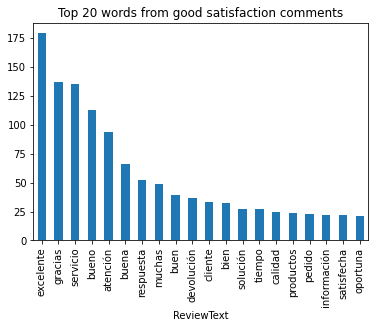

In [59]:
# Getting a list of the most common words for satisfaction_good.
common_words = get_top_n_words(satisfaction_good, 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from good satisfaction comments')

pedido 125
respuesta 97
servicio 70
devolución 64
cliente 60
nunca 58
compra 57
ustedes 54
correo 53
si 52
días 43
atención 36
julio 35
producto 35
prendas 34
comprar 34
hacer 33
dinero 32
solución 32
solo 30


<AxesSubplot:title={'center':'Top 20 words from bad satisfaction comments'}, xlabel='ReviewText'>

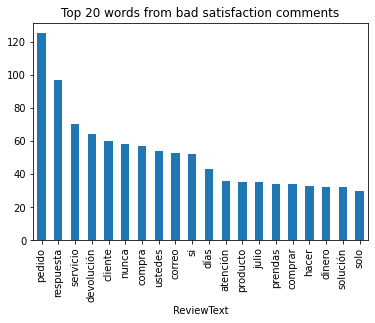

In [60]:
# Getting a list of the most common words for satisfaction_bad.
common_words = get_top_n_words(satisfaction_bad, 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from bad satisfaction comments')

excelente 26
servicio 14
productos 12
buena 11
calidad 9
ropa 8
producto 8
gracias 7
atención 6
mejor 6
encanta 6
offcorss 6
talla 6
entrega 5
diseños 5
niños 5
si 5
super 5
devolución 5
cumplidos 4


<AxesSubplot:title={'center':'Top 20 words from responses_promoter comments'}, xlabel='ReviewText'>

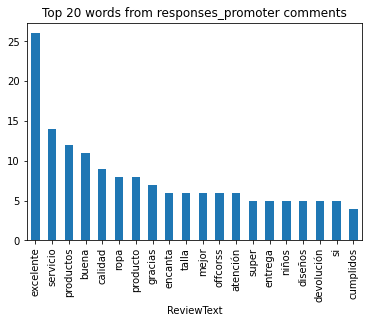

In [61]:
# Getting a list of the most common words for responses_promoter.
common_words = get_top_n_words(responses_promoter, 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from responses_promoter comments')

servicio 3
tiempos 2
entrega 2
menos 2
igual 2
pagina 2
gracias 2
cliente 2
mirando 2
hace 2
contacto 2
sido 2
deberian 1
ser 1
menores 1
demas 1
lineas 1
toman 1
tiempo 1
mala 1


<AxesSubplot:title={'center':'Top 20 words from responses_passive comments'}, xlabel='ReviewText'>

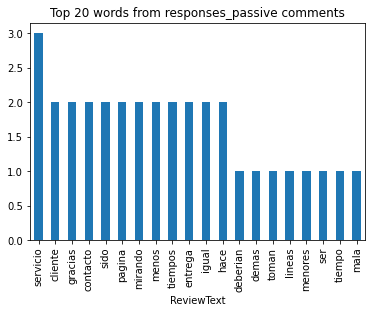

In [62]:
# Getting a list of the most common words for responses_passive.
common_words = get_top_n_words(responses_passive, 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from responses_passive comments')

pedido 15
cliente 15
servicio 14
compra 13
hacer 11
nunca 10
atención 9
respuesta 9
mejorar 9
devolución 8
cambio 8
tiempo 7
ustedes 7
entrega 7
mal 7
verdad 6
solo 6
días 6
prendas 6
producto 5


<AxesSubplot:title={'center':'Top 20 words from responses_detractor comments'}, xlabel='ReviewText'>

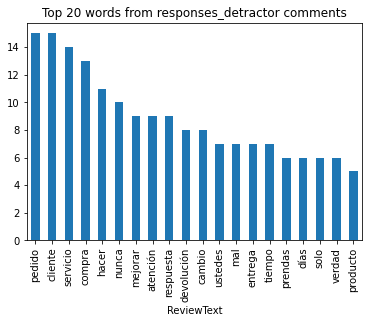

In [63]:
# Getting a list of the most common words for responses_detractor.
common_words = get_top_n_words(responses_detractor, 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from responses_detractor comments')

excelente servicio 48
muchas gracias 46
buen servicio 35
buena atención 26
excelente atención 24
bueno servicio 13
mil gracias 13
servicio cliente 12
servicio gracias 9
buena atencion 9
excelente atencion 8
persona atendió 7
buena calidad 7
clara información 7
excelente calidad 5
gracias atención 5
servicio rápido 5
proceso devolución 5
atención cliente 5
servicio buena 5


<AxesSubplot:title={'center':'Top 20 bigrams from satisfaction_good'}, xlabel='ReviewText'>

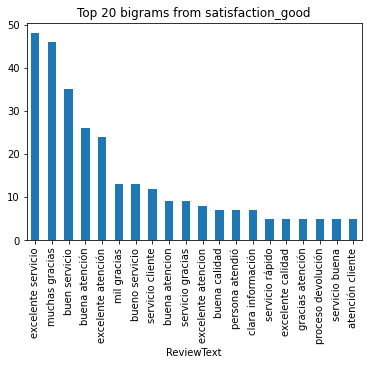

In [65]:
# Get top bigrams and trigrams from satisfaction_good
common_words = get_top_n_words(satisfaction_good, 20,2)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from satisfaction_good')

excelente servicio gracias 4
buen servicio cliente 3
bueno excelente servicio 3
atención muchas gracias 3
buen servicio gracias 3
buena calidad productos 3
bueno servicio gracias 2
muchas gracias atención 2
gracias atención ayuda 2
excelente servicio rápido 2
excelente servicio cliente 2
servicio rápido amable 2
respuesta clara pronta 2
línea servicio cliente 2
respuesta rápida efectiva 2
quisiera saber si 2
muchas gracias pedido 2
bueno muchas gracias 2
servicio prestado ustedes 2
buen servicio felicitaciones 2


<AxesSubplot:title={'center':'Top 20 trigrams from satisfaction_good'}, xlabel='ReviewText'>

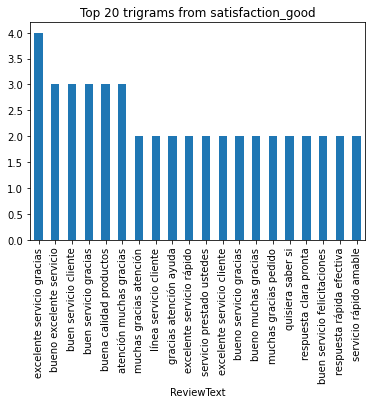

In [67]:
common_words = get_top_n_words(satisfaction_good, 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from satisfaction_good')

servicio cliente 28
pésimo servicio 15
atención cliente 12
mal servicio 10
devolución dinero 9
buenas tardes 9
buenos días 8
muchas gracias 8
mucha demora 7
dar respuesta 7
nunca contestaron 7
tratando comunicarme 7
mala atención 6
dieron respuesta 6
hacer cambio 6
dado respuesta 6
error ustedes 6
volveré comprar 6
días hábiles 6
publicidad engañosa 6


<AxesSubplot:title={'center':'Top 20 bigrams from satisfaction_bad'}, xlabel='ReviewText'>

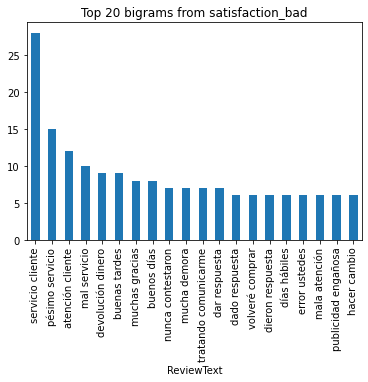

In [66]:
# Get top bigrams and trigrams from satisfaction_bad
common_words = get_top_n_words(satisfaction_bad, 20,2)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from satisfaction_bad')

nunca recibí respuesta 4
servicio cliente chat 4
correo servicio cliente 4
mucha demora respuesta 3
pésimo servicio cliente 3
buenas tardes nombre 3
tardes nombre manifiesto 3
nombre manifiesto haber 3
manifiesto haber recibido 3
haber recibido pedido 3
recibido pedido enviado 3
pedido enviado offcorss 3
enviado offcorss dia 3
offcorss dia 17 3
dia 17 julio 3
17 julio prensa 3
julio prensa año 3
prensa año según 3
año según reporte 3
según reporte entregaron 3


<AxesSubplot:title={'center':'Top 20 trigram from satisfaction_bad'}, xlabel='ReviewText'>

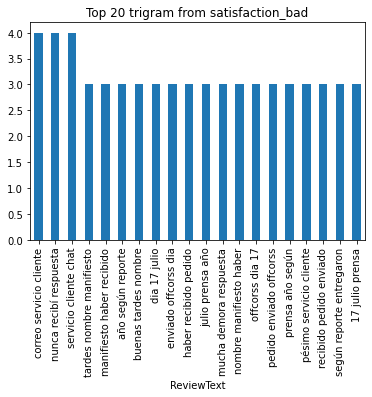

In [69]:
common_words = get_top_n_words(satisfaction_bad, 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigram from satisfaction_bad')

servicio cliente 7
atención cliente 6
hacer cambio 5
cliente nunca 3
tiempos entrega 3
leen atención 2
atención favor 2
favor dictar 2
dictar capacitaciones 2
capacitaciones comprensión 2
comprensión lectura 2
debe ser 2
tallas pedí 2
nunca respondieron 2
dan respuesta 2
ir outlet 2
demasiado tiempo 2
recibo ninguna 2
líneas atención 2
nunca contestan 2


<AxesSubplot:title={'center':'Top 20 bigrams from responses_detractor'}, xlabel='ReviewText'>

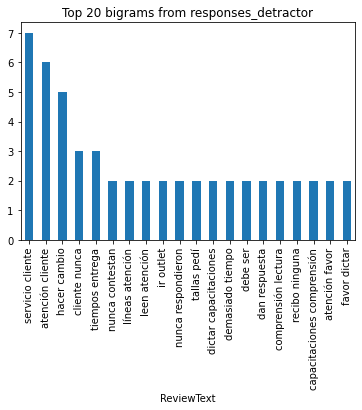

In [70]:
# Get top bigrams and trigrams from responses_detractor
common_words = get_top_n_words(responses_detractor, 20,2)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from responses_detractor')

leen atención favor 2
atención favor dictar 2
favor dictar capacitaciones 2
dictar capacitaciones comprensión 2
capacitaciones comprensión lectura 2
líneas atención cliente 2
primera vez compra 2
atender reclamaciones tiempo 1
reclamaciones tiempo evitar 1
tiempo evitar recibir 1
evitar recibir mercancía 1
recibir mercancía sido 1
mercancía sido cancelada 1
sido cancelada notificar 1
cancelada notificar transportadora 1
notificar transportadora tiempo 1
transportadora tiempo devolución 1
tiempo devolución producto 1
debe poder hacer 1
poder hacer cambios 1


<AxesSubplot:title={'center':'Top 20 trigrams from responses_detractor'}, xlabel='ReviewText'>

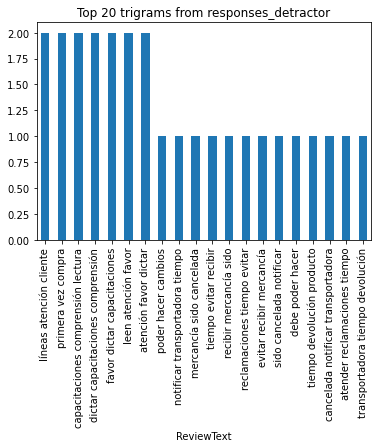

In [71]:
# Get top bigrams and trigrams from responses_detractor
common_words = get_top_n_words(responses_detractor, 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from responses_detractor')

excelente servicio 6
buena calidad 5
excelente atención 4
excelentes productos 3
calidad producto 3
buen servicio 3
sido excelente 2
excelente calidad 2
envíos gratis 2
serios cumplidos 2
puntual entrega 2
diseños niños 2
servicio cliente 2
grandes talla 2
tener excelente 1
excelente presentación 1
presentación buena 1
buena actitud 1
quiero incorporarse 1
incorporarse porta 1


<AxesSubplot:title={'center':'Top 20 bigrams from responses_promoter '}, xlabel='ReviewText'>

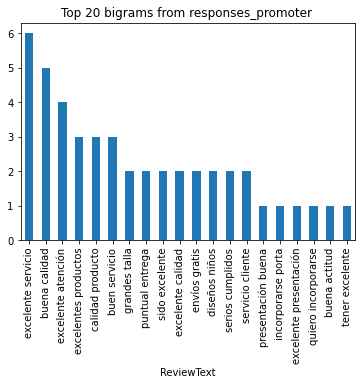

In [72]:
# Get top bigrams and trigrams from responses_promoter 
common_words = get_top_n_words(responses_promoter , 20,2)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from responses_promoter ')

buena calidad producto 2
tener excelente presentación 1
excelente presentación buena 1
presentación buena actitud 1
quiero incorporarse porta 1
cumplidos excelentes productos 1
rápido entrega atención 1
entrega atención cliente 1
atención cliente eficiente 1
tiempos contestar llamada 1
contestar llamada linea 1
llamada linea gratuita 1
linea gratuita fijos 1
gratuita fijos chat 1
fijos chat demasiados 1
chat demasiados largos 1
demasiados largos atencion 1
largos atencion chat 1
atencion chat pagina 1
chat pagina siempre 1


<AxesSubplot:title={'center':'Top 20 trigrams from responses_promoter '}, xlabel='ReviewText'>

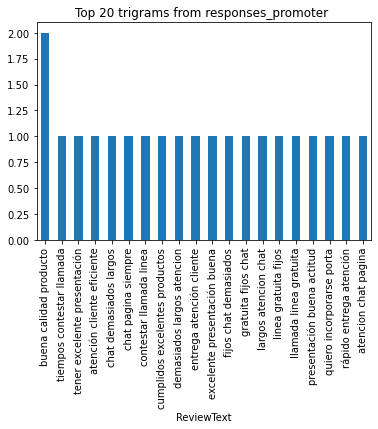

In [73]:

common_words = get_top_n_words(responses_promoter , 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from responses_promoter ')